        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp

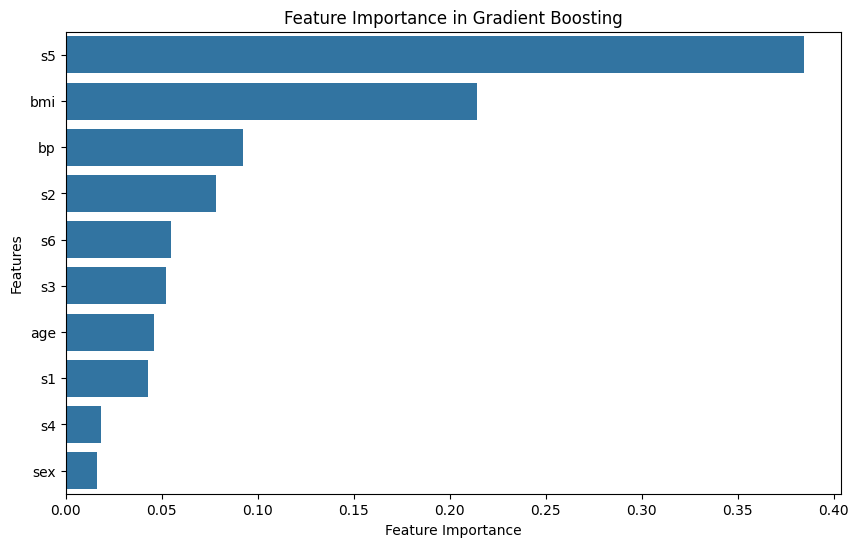

AttributeError: 'GradientBoostingRegressor' object has no attribute 'loss_'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Step 1: Load the Diabetes dataset
data = datasets.load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Step 2: Check data (no nulls, all numeric)
print(df.head())
print(df.info())  # All float64, no missing values
print(df.duplicated().sum())  # No duplicates

# Step 3: Split into features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 5: Train Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=0)
gbr.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")  # Example: ~52.18 (high, needs tuning)

# Step 7: Feature importance
feature_scores = pd.Series(gbr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_scores)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting')
plt.show()

# Step 8: Plot deviance (how well model fits)
test_scores = np.zeros(500, dtype=np.float64)
for i, y_pred_iter in enumerate(gbr.staged_predict(X_test)):
    test_scores[i] = gbr.loss_(y_test, y_pred_iter)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(500) + 1, gbr.train_score_, 'b-', label='Training Deviance')
plt.plot(np.arange(500) + 1, test_scores, 'r-', label='Test Deviance')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance (Error)')
plt.title('Training vs Test Deviance')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()